<a href="https://colab.research.google.com/github/GyanendraChaubey/Explainnable-AI-in-Chronic-Kidney-Disease-Prediction/blob/main/XAI_KidneyDiseasePredictionLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing SHAP Explainar






In [ ]:
!pip install shap

     |████████████████████████████████| 356 kB 5.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491645 sha256=e8e7fbc2aeb8be8850586889f690b8ed22a3b690873903f80bdd011c36036109
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import shap

Importing Necessary Libraries 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Loading Data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/kidney_disease1.csv')

Making copy data

In [ ]:
data1=data.copy()

Understanding Data

In [ ]:
data1.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc=abnormal', 'rbc=normal',
       'pc=abnormal', 'pc=normal', 'pcc=notpresent', 'pcc=present',
       'ba=notpresent', 'ba=present', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'htn=no', 'htn=yes', 'dm=no', 'dm=yes', 'cad=no',
       'cad=yes', 'appet=good', 'appet=poor', 'pe=no', 'pe=yes', 'ane=no',
       'ane=yes', 'classification'],
      dtype='object')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc=abnormal    400 non-null    int64  
 6   rbc=normal      400 non-null    int64  
 7   pc=abnormal     400 non-null    int64  
 8   pc=normal       400 non-null    int64  
 9   pcc=notpresent  400 non-null    int64  
 10  pcc=present     400 non-null    int64  
 11  ba=notpresent   400 non-null    int64  
 12  ba=present      400 non-null    int64  
 13  bgr             400 non-null    float64
 14  bu              400 non-null    float64
 15  sc              400 non-null    float64
 16  sod             400 non-null    float64
 17  pot             400 non-null    flo

In [ ]:
data1.shape

(400, 35)

In [ ]:
data1.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc=abnormal      0
rbc=normal        0
pc=abnormal       0
pc=normal         0
pcc=notpresent    0
pcc=present       0
ba=notpresent     0
ba=present        0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn=no            0
htn=yes           0
dm=no             0
dm=yes            0
cad=no            0
cad=yes           0
appet=good        0
appet=poor        0
pe=no             0
pe=yes            0
ane=no            0
ane=yes           0
classification    0
dtype: int64

In [ ]:
data1['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [ ]:
import seaborn as sns

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


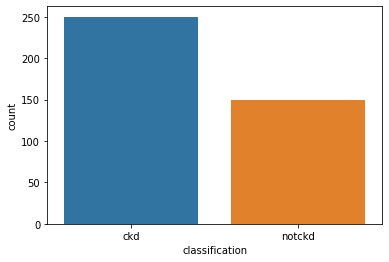

In [ ]:
sns.countplot(data1['classification'])

In [ ]:
data1['classification']=data1['classification'].map({'ckd':1,'notckd':0})

In [ ]:
data1.tail()

,age,bp,sg,al,su,rbc=abnormal,rbc=normal,pc=abnormal,pc=normal,pcc=notpresent,pcc=present,ba=notpresent,ba=present,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn=no,htn=yes,dm=no,dm=yes,cad=no,cad=yes,appet=good,appet=poor,pe=no,pe=yes,ane=no,ane=yes,classification
395,55.0,80.0,1.020,0.0,0.0,0,1,0,1,1,0,1,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,1,0,1,0,1,0,1,0,1,0,1,0,0
396,42.0,70.0,1.025,0.0,0.0,0,1,0,1,1,0,1,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,1,0,1,0,1,0,1,0,1,0,1,0,0
397,12.0,80.0,1.020,0.0,0.0,0,1,0,1,1,0,1,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,1,0,1,0,1,0,1,0,1,0,1,0,0
398,17.0,60.0,1.025,0.0,0.0,0,1,0,1,1,0,1,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,1,0,1,0,1,0,1,0,1,0,1,0,0
399,58.0,80.0,1.025,0.0,0.0,0,1,0,1,1,0,1,0,131.0,18.0,1.1,141.0,3.5,15.8,53.0,6800.0,6.1,1,0,1,0,1,0,1,0,1,0,1,0,0


Separating features and target variable 

In [ ]:
y=data1['classification']
x=data1.drop(columns='classification')

Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Creating Object of model

In [ ]:
model=LogisticRegression(solver='liblinear')

Fitting the model

In [ ]:
model.fit(x_train,y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))

 Testing Accuracy: 99.17%


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Logistic Regression Classifier')

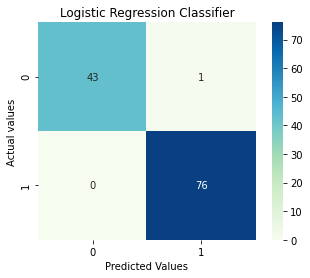

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('Logistic Regression Classifier')

In [ ]:
from sklearn.metrics import classification_report
print('Logistic Regression Classifier')
print(classification_report(y_test, y_pred))

Logistic Regression Classifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.99      1.00      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



XAI: SHAP to explain the *model*

---

SHAP: Shapely Additive Explanations

---


Generate Linear Explainer and SHAP values

In [ ]:
explainer=shap.LinearExplainer(model,x)
shap_values = explainer.shap_values(x)
expected_value = explainer.expected_value

---

*********Visualisations*********

---

Summarize the effect of all features

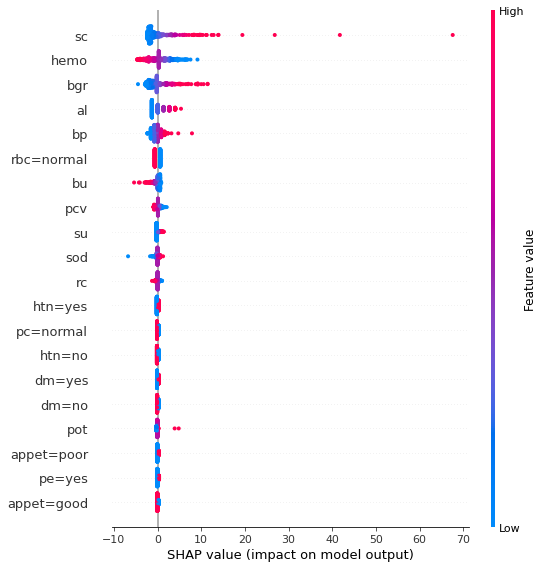

In [ ]:
shap.summary_plot(shap_values, x,title="SHAP summary plot") 

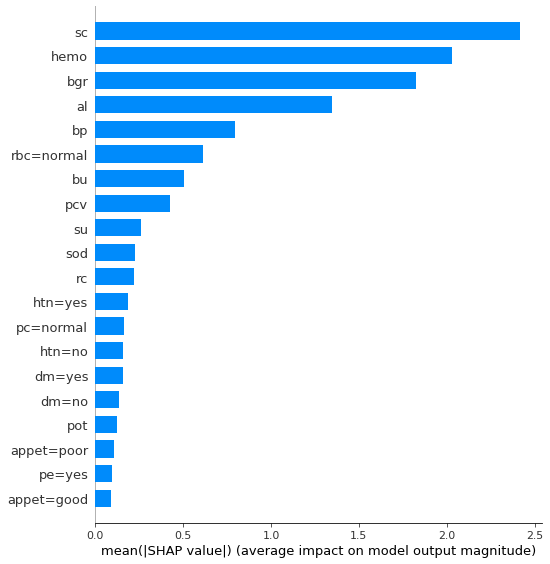

In [ ]:
# Generate summary bar plot 
shap.summary_plot(shap_values, x,plot_type="bar") 

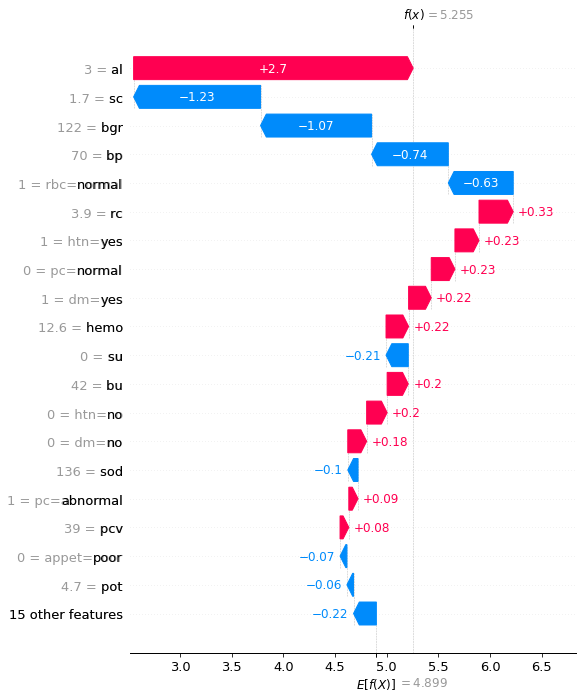

In [ ]:
# Generate waterfall plot  
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[157], features=x.iloc[157,:], max_display=20, show=True)

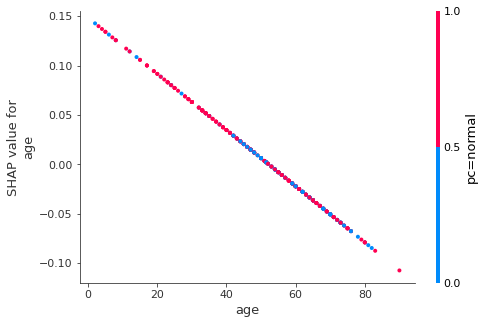

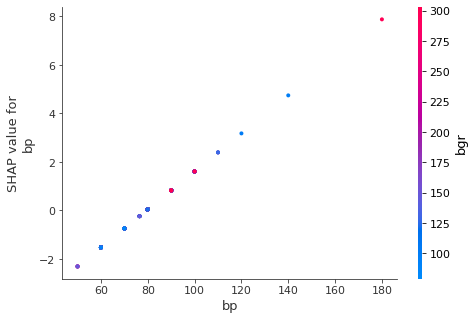

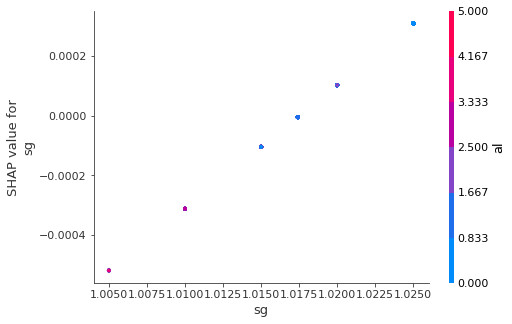

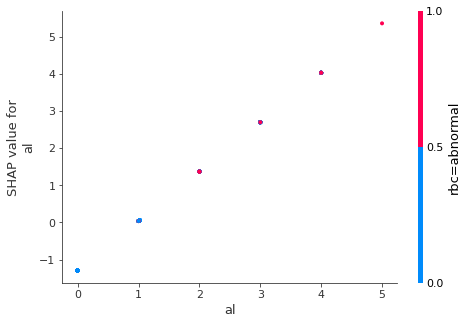

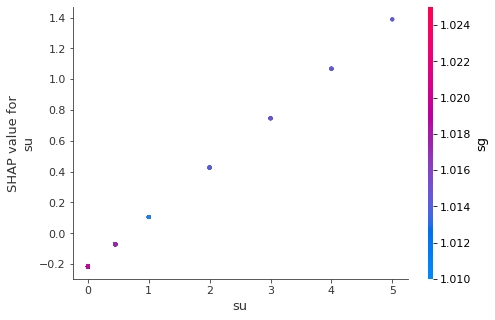

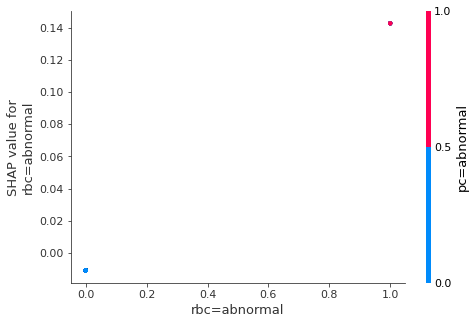

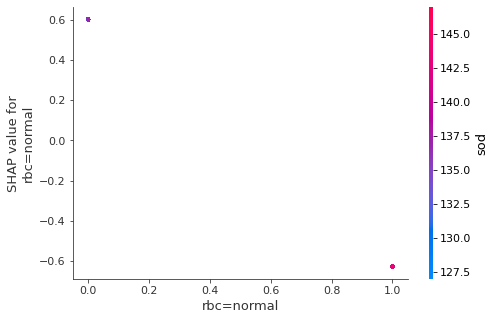

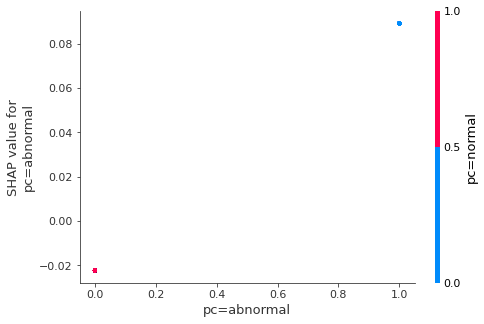

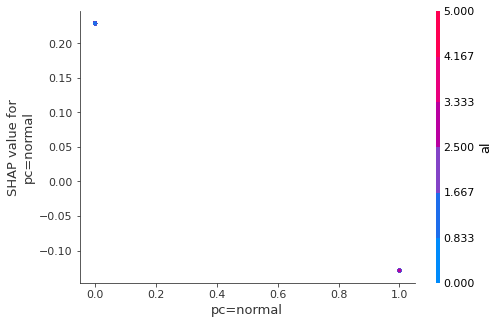

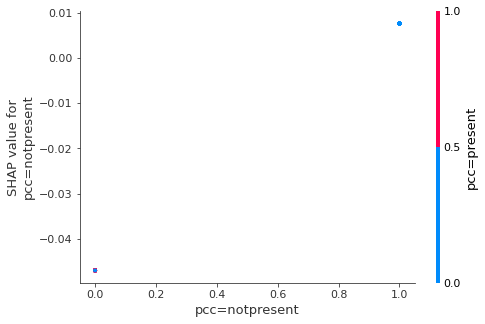

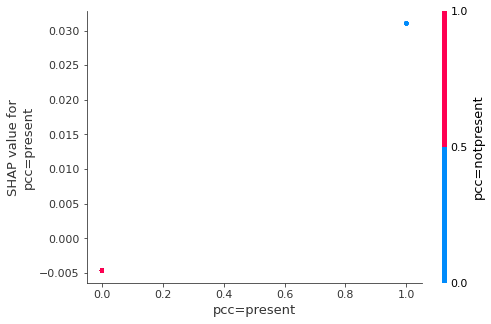

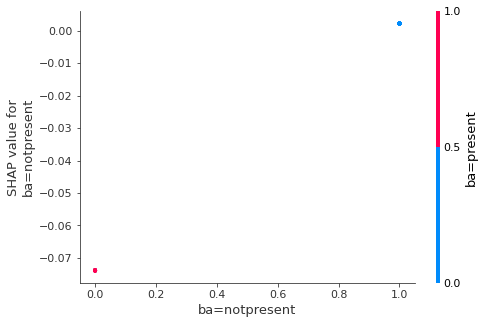

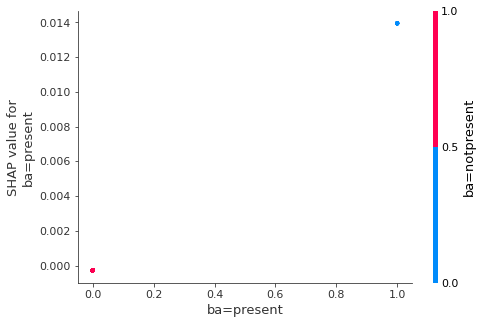

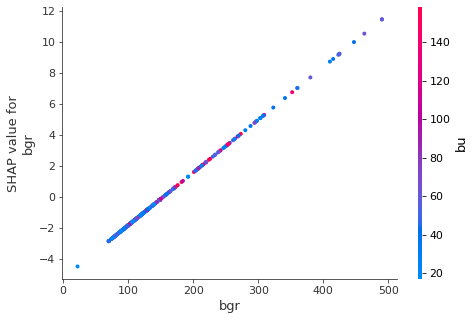

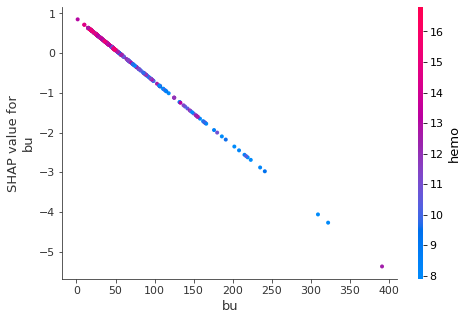

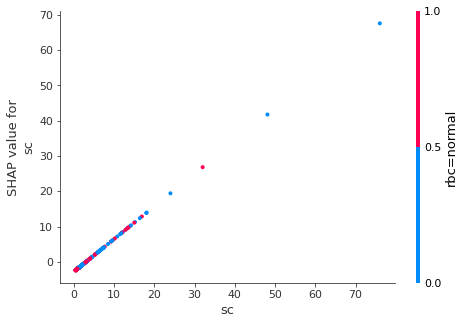

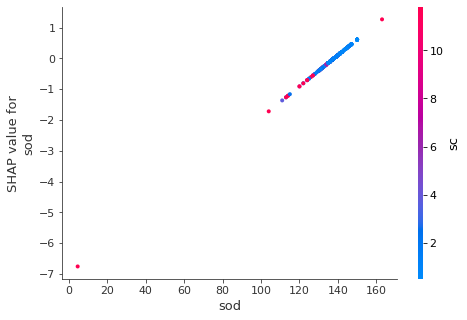

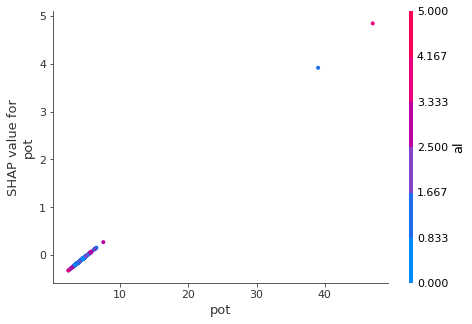

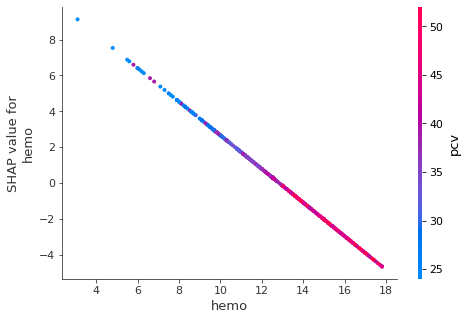

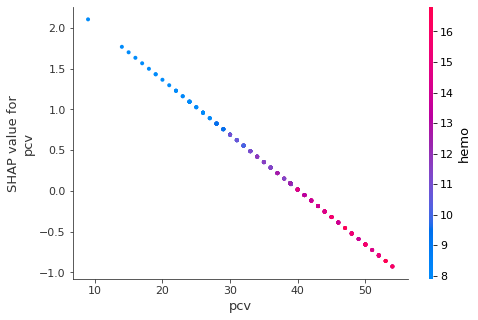

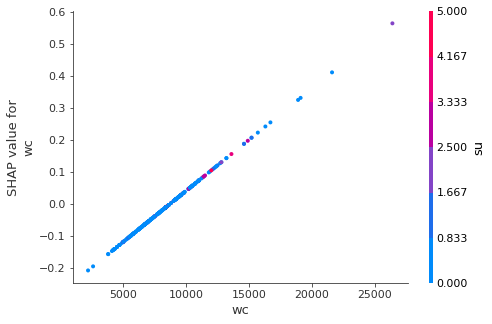

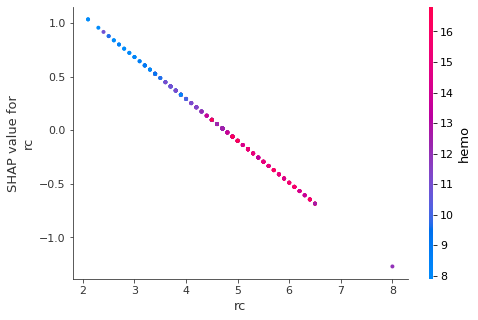

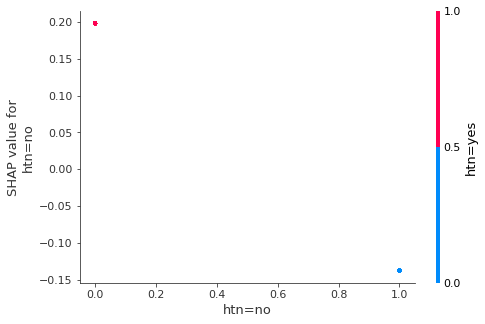

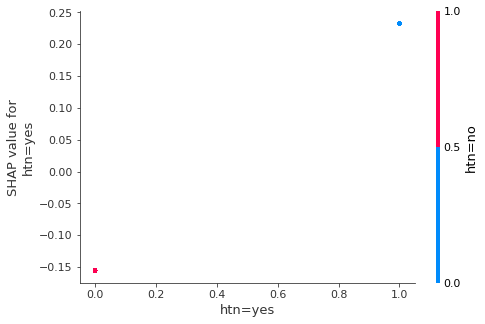

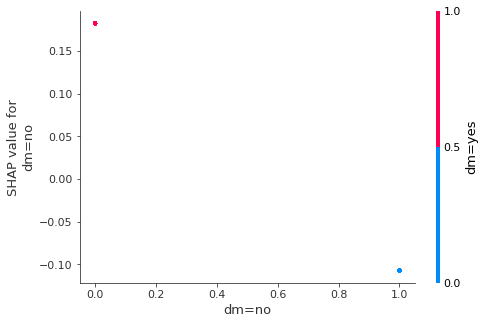

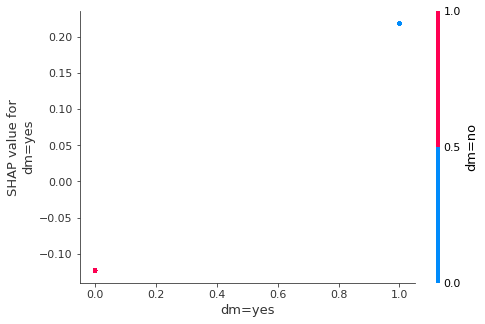

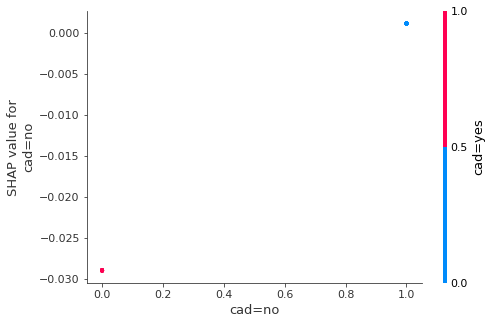

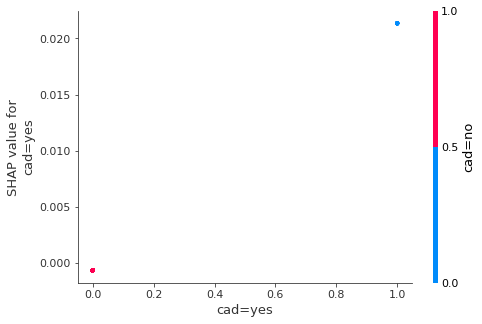

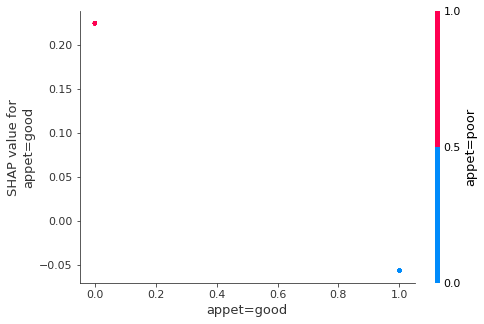

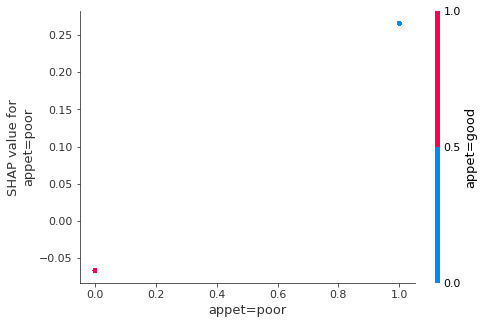

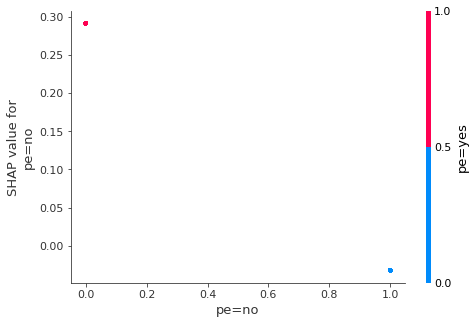

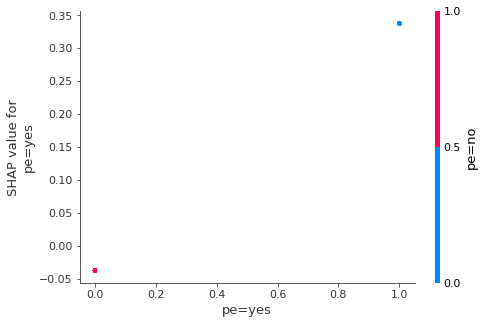

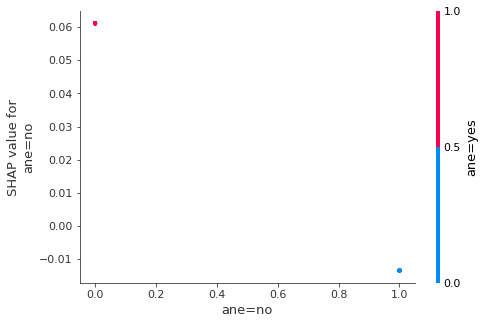

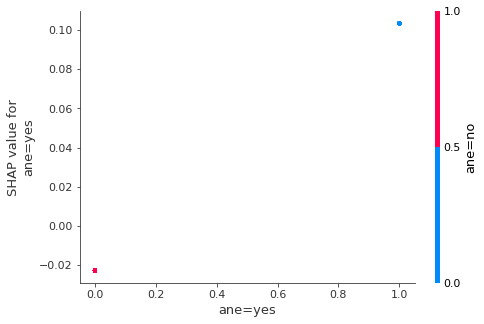

In [ ]:
# Generate multiple dependence plots
for name in x_train.columns:
     shap.dependence_plot(name, shap_values, x)


In [ ]:
# Generate force plot - Multiple rows
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[:399,:], x.iloc[:399,:],link='logit')

In [ ]:
# Generate force plot - Single for class 0
shap.initjs()
abs=399
y_pred=model.predict(x)
print("The prediction is: ",y_pred[abs])
shap.force_plot(explainer.expected_value, shap_values[abs,:], x.iloc[abs,:],link='logit')

The prediction is:  0


In [ ]:
# Generate force plot - Single for class 1
shap.initjs()
abs=1
y_pred=model.predict(x)
print("The prediction is: ",y_pred[abs])
shap.force_plot(explainer.expected_value, shap_values[abs,:], x.iloc[abs,:],link='logit')

The prediction is:  1


The prediction is:  1


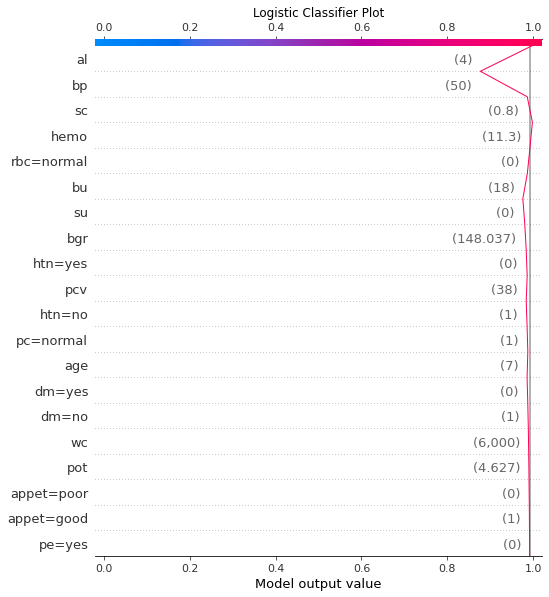

In [ ]:
# Generate Decision plot 
print("The prediction is: ",y_pred[1])
shap.decision_plot(expected_value, shap_values[1], link='logit',features=x.iloc[1,:], feature_names=(x.columns.tolist()),show=True,title="Logistic Classifier Plot")

The prediction is:  0


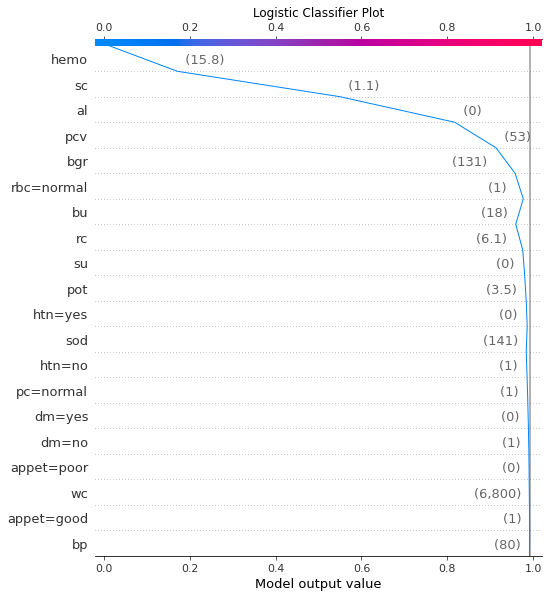

In [ ]:
# Generate Decision plot 
print("The prediction is: ",y_pred[399])
shap.decision_plot(expected_value, shap_values[399], link='logit',features=x.iloc[399,:], feature_names=(x.columns.tolist()),show=True,title="Logistic Classifier Plot")

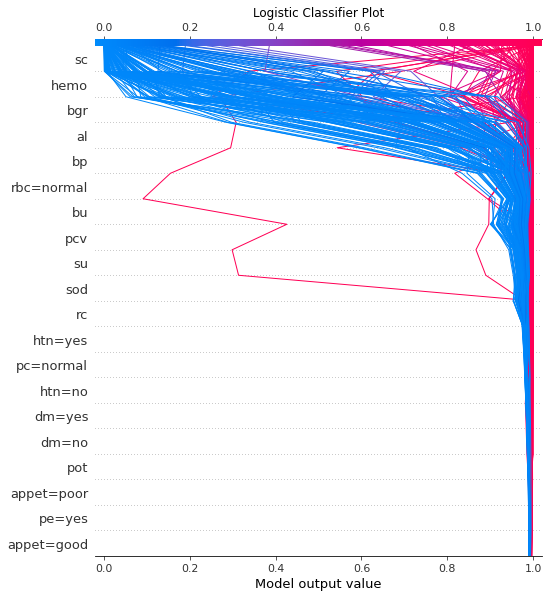

In [ ]:
# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[:399], link='logit',features=x.iloc[:399,:], feature_names=(x.columns.tolist()),show=True,title="Logistic Classifier Plot",return_objects=True)

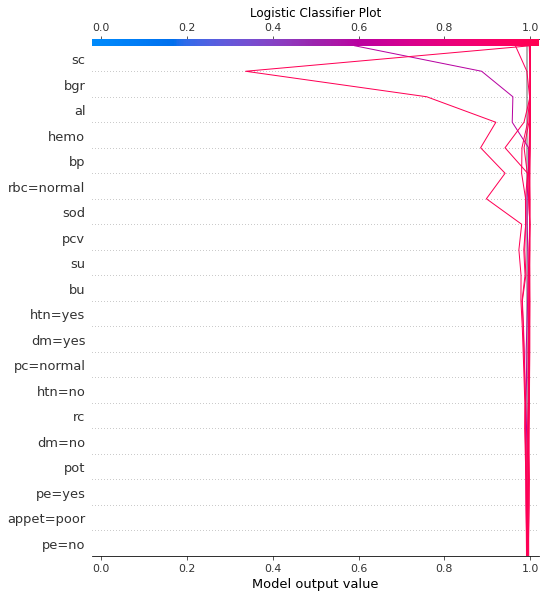

In [ ]:
# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[:10], link='logit',features=x.iloc[:10,:], feature_names=(x.columns.tolist()),show=True,title="Logistic Classifier Plot",return_objects=True)

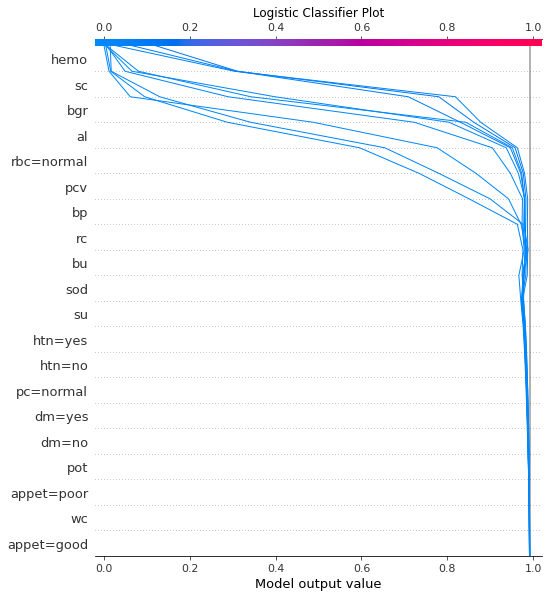

In [ ]:
# Generate Decision plot 
shap.decision_plot(expected_value, shap_values[390:399], link='logit',features=x.iloc[390:399,:], feature_names=(x.columns.tolist()),show=True,title="Logistic Classifier Plot",return_objects=True)

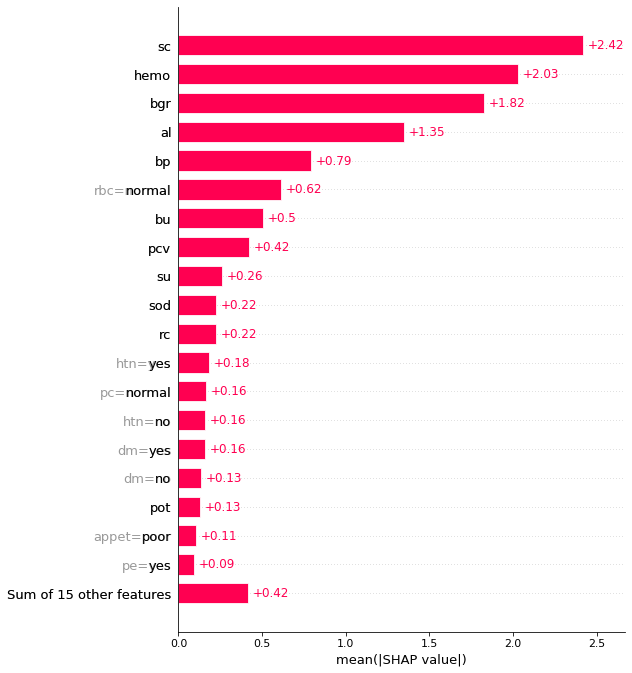

In [ ]:
shapvalues=explainer(x)
shap.plots.bar(shapvalues,max_display=20)

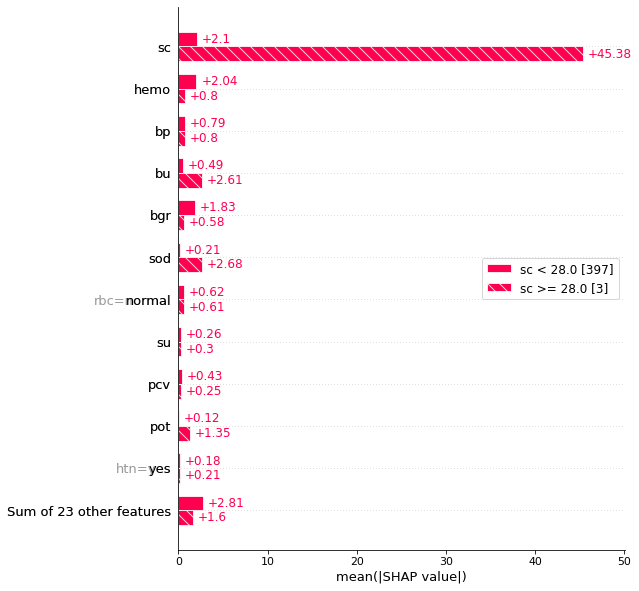

In [ ]:
shap.plots.bar(shapvalues.cohorts(2).abs.mean(0),max_display=12)

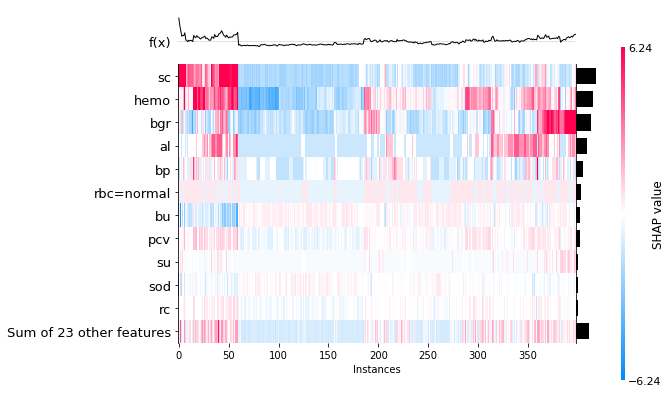

In [ ]:
shap.plots.heatmap(shapvalues[:399],max_display=12)

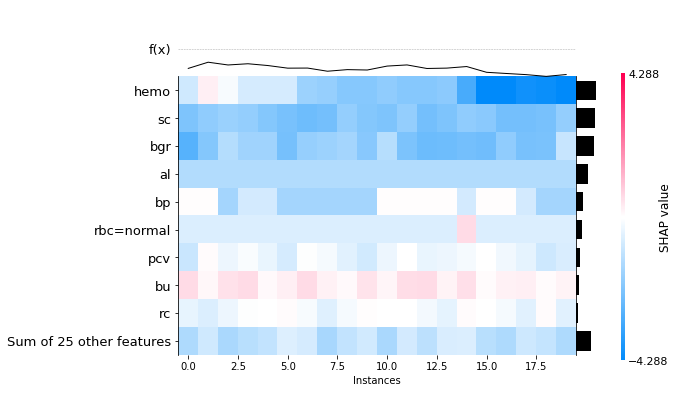

In [ ]:
shap.plots.heatmap(shapvalues[350:370])

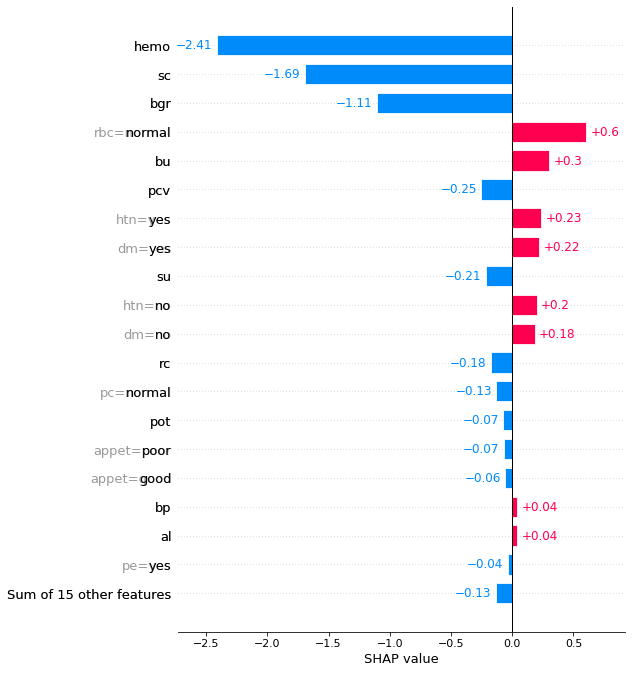

In [ ]:
shap.plots.bar(shapvalues[0],max_display=20)

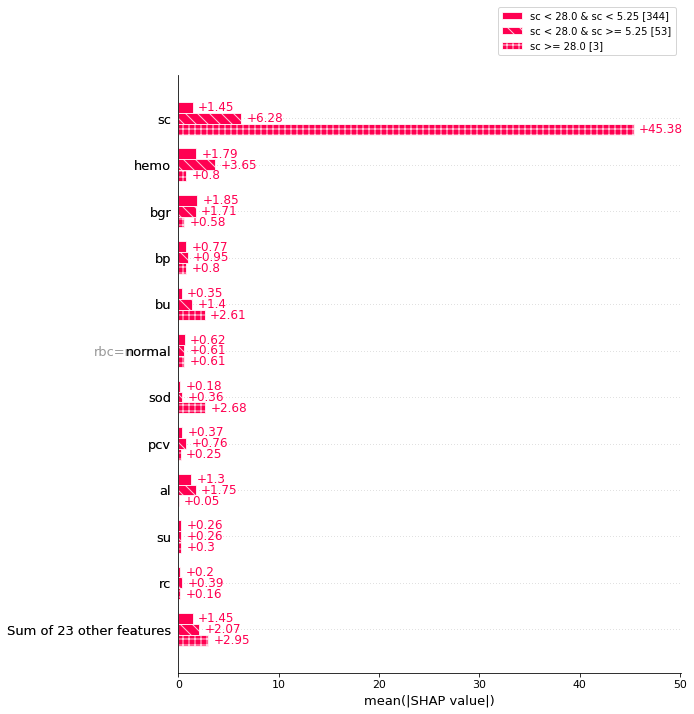

In [ ]:
shap.plots.bar(shapvalues.cohorts(3).abs.mean(0),
               show=False,max_display=12)
fig = plt.gcf() # gcf means "get current figure"
fig.set_figheight(11)
fig.set_figwidth(9)
#plt.rcParams['font.size'] = '12'
ax = plt.gca() #gca means "get current axes"
leg = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102))
for l in leg.get_texts(): l.set_text(l.get_text().replace('Class', 'Klasse'))
plt.show()
fig.savefig('thyroid')

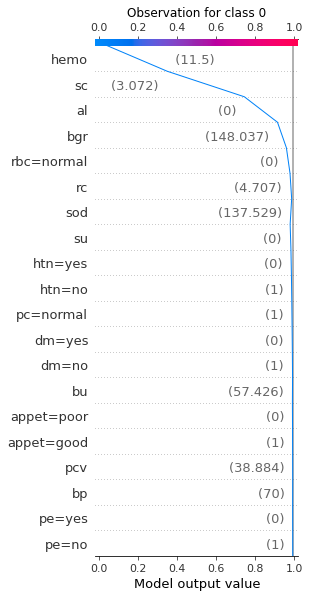

                       Observation for Class 1                        


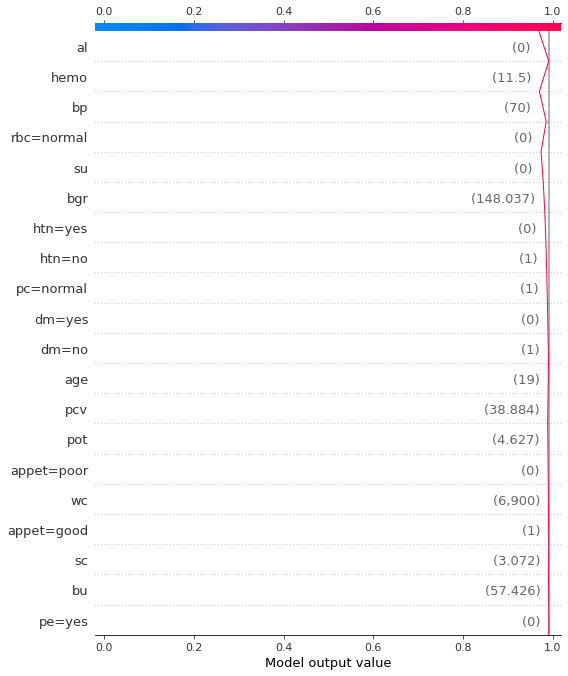

In [ ]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
shap_values = explainer.shap_values(x_test)[119]
shap.decision_plot(expected_value, shap_values, x_test, show=False, link='logit')
ax1.title.set_text('Observation for class 0')
plt.show()
str = "Observation for Class 1"
str2 = str.center(70)
print(str2)
ax2 = fig.add_subplot(122)
shap_values = explainer.shap_values(x_test)[0]
shap.decision_plot(expected_value, shap_values, x_test, show=False, link='logit')
ax2.title.set_text('Observation class 1')
plt.tight_layout()
plt.show()

In [ ]:
y_test

209    1
280    0
33     1
210    1
93     1
      ..
60     1
79     1
285    0
305    0
281    0
Name: classification, Length: 120, dtype: int64